

## Lab 2

# Linear Regression


# Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

There is one unnamed column also in this dataset. Please remove and ignore that coloumn.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

In [1]:
import pandas as pd
import numpy as np

## Question 1
Read the dataset given in file named 'bigcity.csv'.

In [2]:
data = pd.read_csv("bigcity.csv")
data.columns

Index(['Unnamed: 0', 'u', 'x'], dtype='object')

In [3]:
data = data[['u', 'x']]
data.head(10)

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


## Question 2

Print statistics of the dataset and read 10 samples. Use describe() to get the statistics

In [4]:
data.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


In [5]:
data.head(10)

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75
5,37,63
6,29,50
7,23,48
8,30,111
9,2,50


## Question 3 - Transform the dataset 
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe


In [6]:
print(data.shape)
x = data[['u']]
y = data[['x']]

(49, 2)


## Question 4- Check the dataset for any missing values

In [7]:
sum(data.isna().values.ravel())

0

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

## Question 5 print out the correlation matrix 

In [8]:
data.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

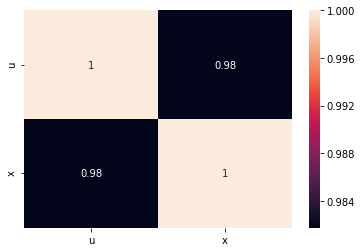

In [10]:
sns.heatmap(data.corr(), annot=True)
# Heatmap of correlation coeffieicnets also shows the strong relationship between u (1920 population) & x (1930 population)

Text(0, 0.5, 'Population in 1930')

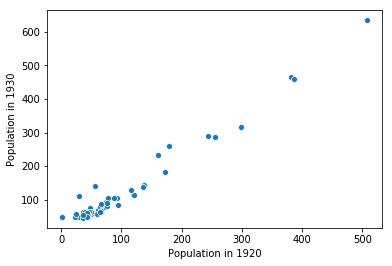

In [18]:
# Additionally let's draw scatter plot between u (1920 population) & x (1930 population)
sns.scatterplot(x='u', y='x', data=data)
plt.xlabel('Population in 1920')
plt.ylabel('Population in 1930')
# This also shows a strong relationship between u & x

## Question 6 - Plot a pairplot and mention your inference

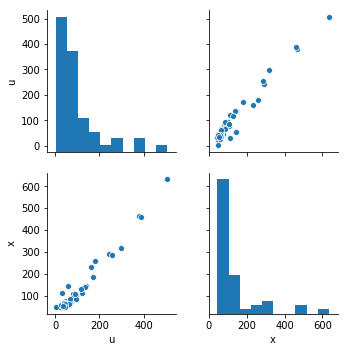

In [24]:
sns.pairplot(data)


In [95]:
# Inference
# Again Pair plot between u & x indicates strong relationship between u and x. 
# Hence the population in 1920 (u) can be considered as a strong predictor (Independent Variable) for 
# the population in 1930 (Dependent Variable)

### The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

## Question 7 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [27]:
row_count_from_shape = lambda x : x.shape[0]

In [28]:
test_train_df = pd.DataFrame({"x_train": row_count_from_shape(x_train),
                              "x_test" : row_count_from_shape(x_test),
                              "y_train" : row_count_from_shape(y_train),
                              "y_test" : row_count_from_shape(y_test)
                             }, index = ['Total Records'])
test_train_df

,x_train,x_test,y_train,y_test
Total Records,39,10,39,10


## Question 8 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model.fit(x, y)

β0β1 = pd.DataFrame({"Coefficient-β1": model.coef_.ravel(), "Intercept-β0": model.intercept_})
β0β1

,Coefficient-β1,Intercept-β0
0,1.157734,8.383956


Check: coef_ and intercept_ functions can help you get coefficients & intercept

## Question 9 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

Hint - y = mx + c, plot y

In [0]:
import matplotlib.pyplot as plt

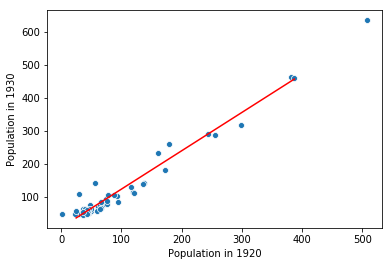

In [36]:
sns.scatterplot(x='u', y='x', data=data)
plt.xlabel("Population in 1920")
plt.ylabel("Population in 1930")

# Take minimum population and maximum population from x_test
x_test_sample = pd.DataFrame({"1920": [x_test.values.min(), x_test.values.max()] })

# Predict corresponding population in 1930 using our model for these values
y_predicted = model.predict(x_test_sample)

# Draw a line using (minX, PredictedY) & (maxX, PredictedY)
plt.plot(x_test_sample, y_predicted, color='red')


## Question 10 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [45]:
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)
print("RMSE = ", rmse)

RMSE =  16.931625877395764


0.9804554695206655

In [38]:
s = pd.Series(y_pred.ravel())

result = pd.DataFrame({"Y_TEST" : y_test.iloc[:,0].values,
                       "Y_PRED" : s.values})
result

,Y_TEST,Y_PRED
0,57,37.327299
1,61,58.166506
2,232,194.779083
3,105,109.106789
4,80,96.371718
5,139,165.835740
6,60,54.693304
7,77,82.478913
8,46,50.062370
9,459,456.426900


## Question 11 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [43]:
train_score = model.score(X=x_train, y=y_train)
print("Train Score = ", train_score)

Train Score =  0.9596036923932009


In [42]:
test_score = model.score(X=x_test, y=y_test)
print("Test Score = ", test_score)

Test Score =  0.9804554695206655
